# k Nearest Neighbour Classification (kNN)

## Data set: https://archive.ics.uci.edu/dataset/45/heart+disease
+ The dataset comprises of 303 instances and 13 features, aiming to predict the presence of heart disease in a patient. For this regression problem, the model is built upon one of the two target variables.
+ The target variable in the cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**Note : We are using the same data as the decision tree classification (Heart Disease Prediction)**

 ## Objectives (Business Understanding):
+ The aim of this classification analysis is to **develop a predictive model** that can help medical professionals **identify patients at risk of heart disease** based on key clinical and physiological features.
+ This supports the broader goal of **improving preventive healthcare** by enabling early detection of heart disease.
+ The results can guide healthcare professionals in early diagnosis and proper after planning.

## Objectives of the kNN Classification:
+ Predict the **presence or absence of heart disease** using **13 clinical attributes** such as age, cholesterol level, blood pressure, maximum heart rate etc.
+ Develop and evaluate a **kNN Classifier**.
+ Interpret the most influential clinical features contributing to heart disease prediction.
+ Compare model results with decision tree results.

## Data Exploration (Data Understanding & Preparation)
#### The dataset comprises of 303 instances, 13 features and 1 target variable.

#### Features (independent variables)
+ age
+ sex
+ cp (Chest pain type)
+ trestbps (Resting blood pressure)
+ chol (Cholestrol)
+ fbs (Fasting blood sugar)
+ restecg (Resting ECG)
+ thalach (Maximum heart rate)
+ exang (Exercise induced angina)
+ oldpeak (ST depression)
+ slope
+ ca (No of major vessels)
+ thal
  
#### Target (dependent variable)
+ num

In [64]:
import pandas as pd

# Read the data from the csv file
df = pd.read_csv('data/processed.cleveland.csv')

# Print the type of the variable df
print("Type: ", type(df))

Type:  <class 'pandas.core.frame.DataFrame'>


In [65]:
# Print the shape of the data frame
print("\nShape: ", df.shape)

# Print information on the data frame
print("\nInfo: ")
df.info()

# Predictions in the dataset
print('\nValues of Heart Disease Diagnosis')
print(df.num.value_counts())


Shape:  (303, 14)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Values of Heart Disease Diagnosis
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


**Note:**
+ There are 303 instances and 14 columns including the target variable.
+ Every column has 303 non-null values.
+ There are a couple of data missing in the columns 'ca' and 'thal'.

In [66]:
# Print the first 5 rows of the data frame
print("The first 5 rows of the dataframe: ")
df.head()

The first 5 rows of the dataframe: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [67]:
# Describe the data 
print("\nDescription of the data: ")
df.describe()


Description of the data: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Note:**
+ There are no major missing values, except minor gaps in 'ca' and 'thal'.
+ Most variables are continuous, except a few categorical ones (sex, cp, fbs, restecg, exang, slope, ca, thal).
+ Features like 'chol' and 'thalach' have larger numeric ranges compared to binary features like 'sex' or 'fbs'. Hence, feature **scaling may be good before modeling**.

In [68]:
# Interpret the correlation between the target and other variables
print("\nCorrelation: ")
df.corr()


Correlation: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


In [69]:
# Correlation between the target variable num (heart disease prediction) and other attributes 
corr_with_target = df.corr()['num'].sort_values(ascending=False)
print(corr_with_target)

num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64


**Note:**
+ From the correlation matrix, the most influential variables correlated with heart disease are 'ca', 'thal', and 'oldpeak'.
+ 'cp', 'exang', and slope also have moderate predictive power.
+ 'thalach' is negatively correlated, meaning healthier individuals tend to reach higher maximum heart rates.
+ Variables like 'chol', 'fbs', 'age', 'trestbps' etc show weak correlation.

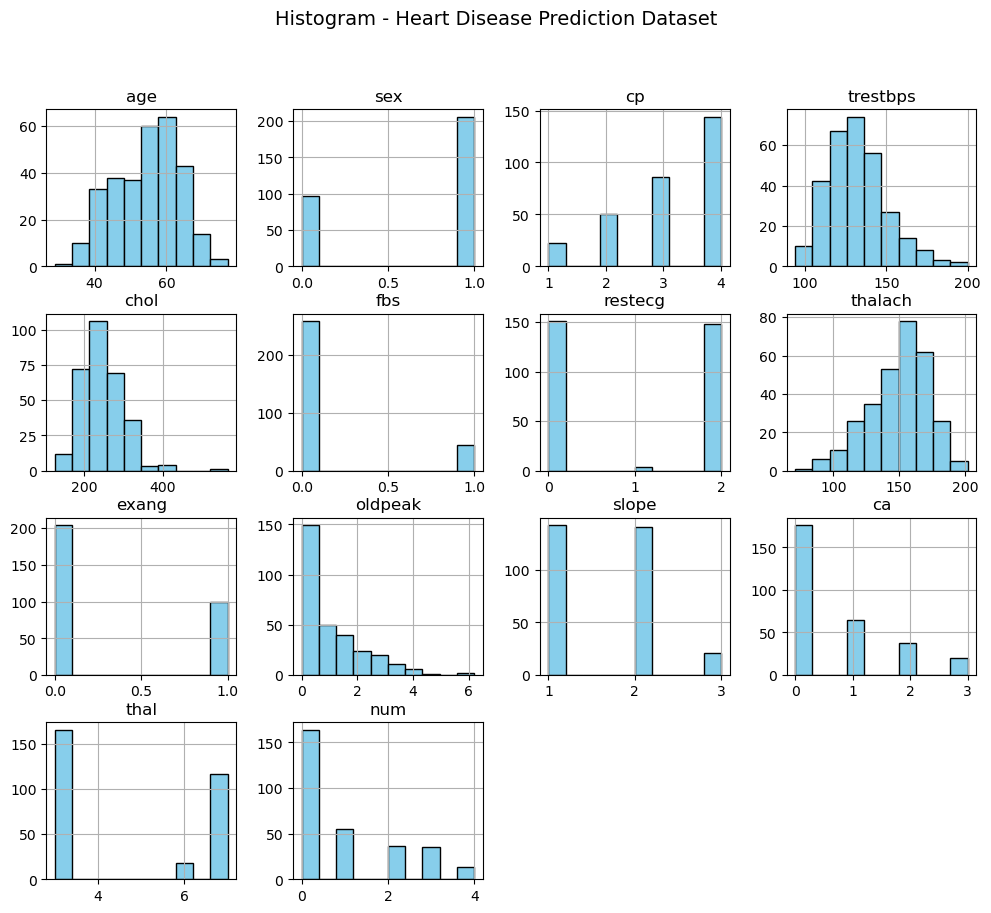

In [70]:
import matplotlib.pyplot as plt

# Draw the histogram 
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram - Heart Disease Prediction Dataset', fontsize=14)
plt.show()

<Figure size 1400x1400 with 0 Axes>

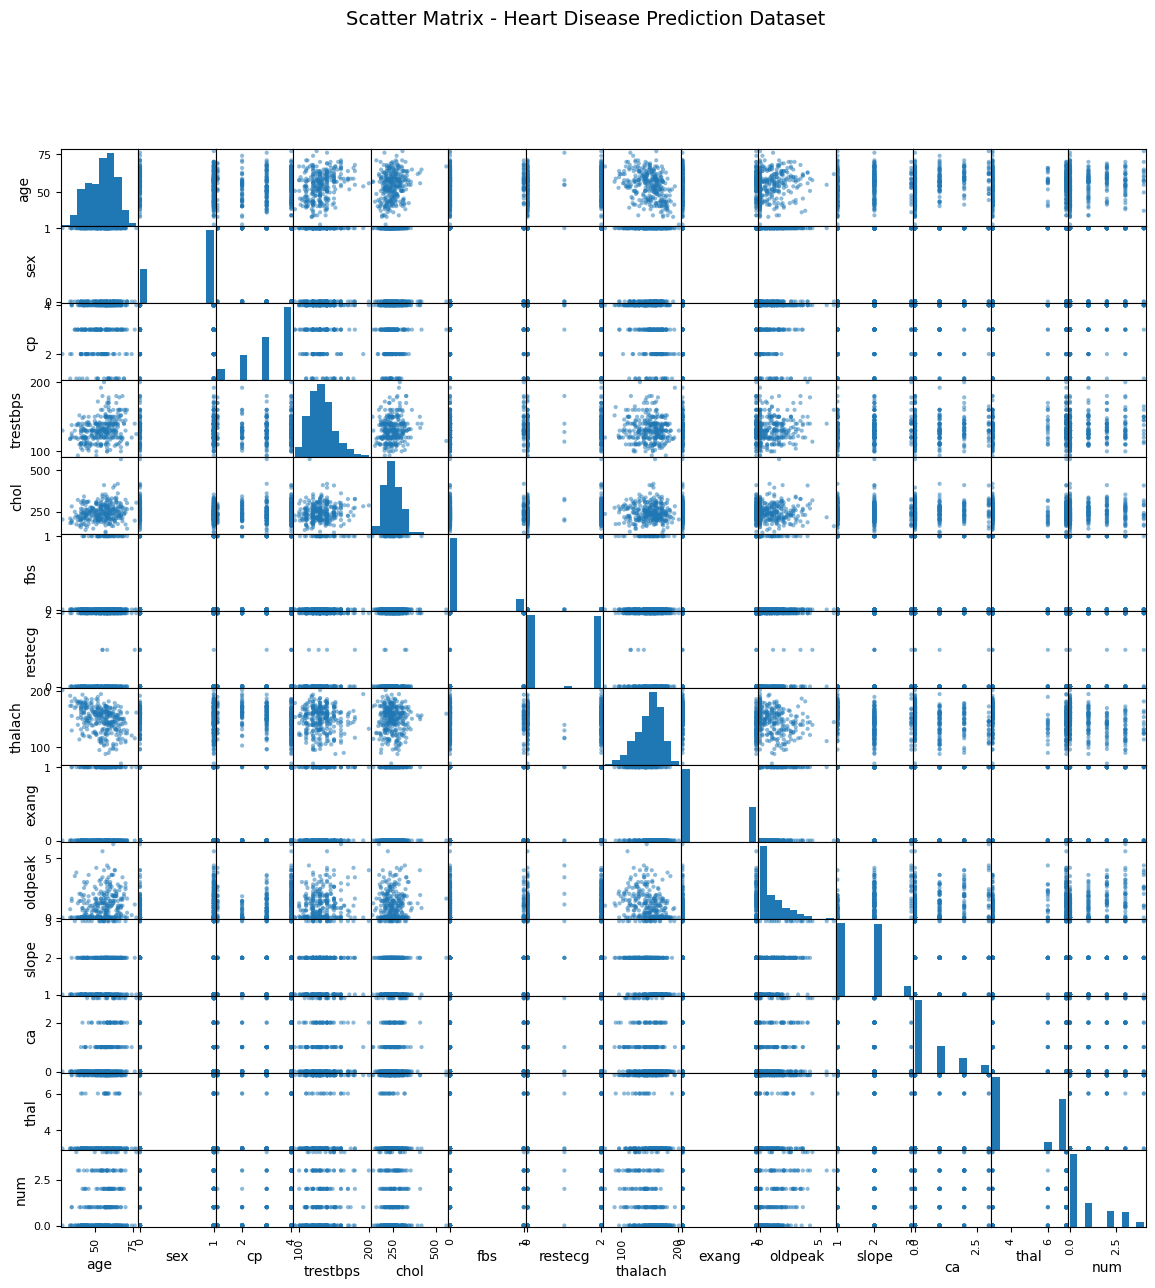

In [71]:
from pandas.plotting import scatter_matrix

# Draw scatter matrix
plt.figure(figsize=(14, 14))
scatter_matrix(df, figsize=(14, 14))

plt.suptitle('Scatter Matrix - Heart Disease Prediction Dataset', fontsize=14)
plt.savefig('plots/HeartDiseasePredictionSM.png')
plt.show()

**Note**:
+ Most features show weak linear relationships
+ 'age', 'chol', and 'trestbps' shows a mild positive relationship, so older individuals tend to have higher cholesterol and resting blood pressure.
+ 'thalach' (maximum heart rate) shows a negative relationship with age and num, indicating that younger, healthier individuals reach higher heart rates and are less likely to have heart disease.

In [72]:
# Determine the input and target variables - X (input) y (target)
df_clean = df.dropna()
X = df_clean.drop('num', axis='columns')
y = df_clean.num

# Convert the target variable values into binary
y = y.apply(lambda x: 1 if x > 0 else 0)

# Convert the categorical variables using one hot encoding:
X = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
print(list(X.columns))

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']


**Note:**
+ We are dropping the rows with missing values because unlike decision trees, knn cannot handle missing values as NaN

In [73]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Print the shape of X and y after data preparation.
print("Final shape of X:", X.shape)
print("Final shape of y:", y.shape)

Final shape of X: (297, 25)
Final shape of y: (297,)


# Modeling - k Nearest Neighbour

In [75]:
from sklearn.preprocessing import StandardScaler

# Scale before modeling to improve accuracy
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

training_accuracy = []
validation_accuracy = []

for k in range(1,25) :
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print("k: ", k , "   validation accuracy", scores.mean())
    validation_accuracy.append(scores.mean())

# Find the best k value and cross validation accuracy:
best_k = range(1, 25)[validation_accuracy.index(max(validation_accuracy))]
best_accuracy = max(validation_accuracy)
print("\nbest_k:", best_k)
print("\nbest_accuracy:", best_accuracy)

k:  1    validation accuracy 0.6998188405797102
k:  2    validation accuracy 0.7460144927536232
k:  3    validation accuracy 0.7929347826086957
k:  4    validation accuracy 0.7929347826086957
k:  5    validation accuracy 0.7844202898550725
k:  6    validation accuracy 0.8056159420289856
k:  7    validation accuracy 0.7931159420289855
k:  8    validation accuracy 0.7847826086956522
k:  9    validation accuracy 0.7889492753623188
k:  10    validation accuracy 0.7932971014492753
k:  11    validation accuracy 0.7974637681159421
k:  12    validation accuracy 0.8103260869565216
k:  13    validation accuracy 0.8103260869565219
k:  14    validation accuracy 0.8269927536231885
k:  15    validation accuracy 0.8144927536231885
k:  16    validation accuracy 0.8103260869565219
k:  17    validation accuracy 0.8144927536231885
k:  18    validation accuracy 0.8188405797101449
k:  19    validation accuracy 0.818659420289855
k:  20    validation accuracy 0.8146739130434781
k:  21    validation accuracy 

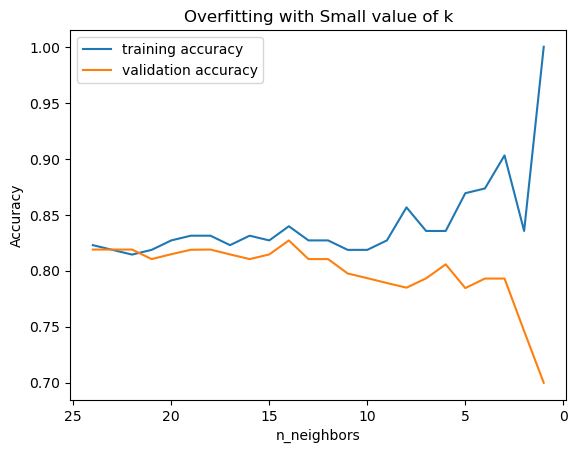

In [77]:
# Plot training and validation accuracy
plt.plot(range(1,25), training_accuracy , label="training accuracy")
plt.plot(range(1,25), validation_accuracy, label="validation accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Small value of k')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig('plots/HeartDiseasekNNoverfitting.png')

**Note:**
+ The plot shows that small k values (1–3) cause overfitting, that is very high training accuracy but lower validation accuracy.

In [78]:
# Train the model - kNN classification
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

# Evaluation

In [87]:
# Print the accuracies on the training and testing data
print("Best k value:",best_k)
print("Training Accuracy:", knn.score(X_train, y_train))
print("Test Accuracy:", knn.score(X_test, y_test))

Best k value: 14
Training Accuracy: 0.8396624472573839
Test Accuracy: 0.9


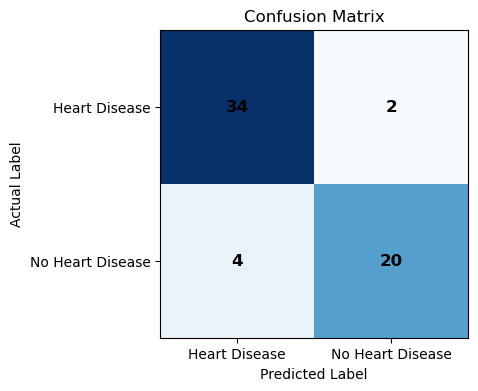

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_hat = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Heart Disease', 'No Heart Disease']

# Confusion Matrix Plot
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, cmap='Blues')

# Axis labels
ax.set(
    xticks=np.arange(len(labels)),
    yticks=np.arange(len(labels)),
    xticklabels=labels, yticklabels=labels,
    xlabel='Predicted Label', ylabel='Actual Label',
    title='Confusion Matrix'
)

# Add counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]}", ha="center", va="center",
                color="black", fontsize=12, fontweight='bold')
plt.savefig('plots/ConfusionMatrixHeartDiseaseKNN.png')
plt.show()

**Note:**
+ The optimal k value (14) achieved 83.9% training accuracy and 90% test accuracy, showing a well-balanced model with good generalization.
+ kNN performed slightly better than the Decision Tree (85.2%), indicating that distance-based classification suits this dataset.
+ The model correctly identified: 31 patients without disease (TN) 20 patients with disease (TP)
+ It misclassified 9 patients total: 4 false (FP) 5 missed diagnoses (FN)
+ The confusion matrix shows the kNN model correctly classified most cases, with an overall accuracy of 85%.

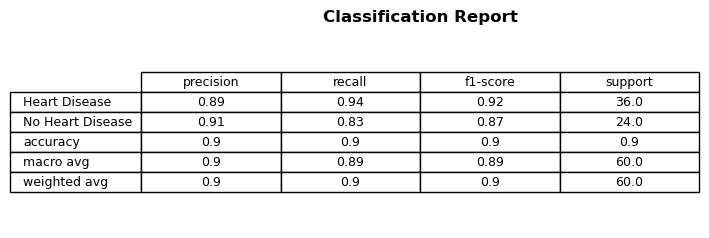

In [88]:
# Classification Report
report = classification_report(y_test, y_hat, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot as a table
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')
tbl = ax.table(
    cellText=np.round(df_report.values, 2),
    rowLabels=df_report.index,
    colLabels=df_report.columns,
    loc='center',
    cellLoc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.2)

plt.title("Classification Report", fontsize=12, fontweight='bold', pad=10)
plt.show()

# Conclusion

#### The kNN model generalizes well and (k=14) achieved 90% test accuracy, outperforming the Decision Tree 83.6%.